# Powerplantmatching - Example of Use

In [1]:
import powerplantmatching as pm
import pandas as pd

Load open source data published bei the Global Energy Observation, [GEO](http://www.globalenergyobservatory.org). As you might know, this is not the original format of the database but the standardized format of powerplantmatching.

In [2]:
geo = pm.data.GEO()

geo.head()

GEO,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,YearCommissioned,Retrofit,lat,lon,projectID
0,Aarberg,Hydro,Run-Of-River,PP,Switzerland,10.504635,NaN,NaN,NaN,NaN,1968.0,1968.0,47.03780,7.2720,GEO45222
1,Aberthaw,Hard Coal,Steam Turbine,PP,United Kingdom,1382.987474,NaN,NaN,NaN,NaN,2008.0,2008.0,51.38731,-3.4049,GEO1972
2,Ablaincourt pressoir,Wind,NaN,PP,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.84330,2.8017,GEO40074
3,Abono,Hard Coal,Steam Turbine,PP,Spain,849.799703,NaN,NaN,NaN,NaN,2005.0,2005.0,43.55280,-5.7231,GEO43673
4,Abwinden asten,Hydro,Run-Of-River,PP,Austria,113.856689,NaN,NaN,NaN,NaN,1979.0,1979.0,48.24798,14.4305,GEO45165


Load the data published by the [ENTSOE](https://transparency.entsoe.eu/generation/r2/installedCapacityPerProductionUnit/show) which has the same format as the geo data.

In [3]:
entsoe = pm.data.ENTSOE()

entsoe.head()

ENTSOE,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,YearCommissioned,Retrofit,lat,lon,projectID
0,Aboño,Hard Coal,NaN,PP,Spain,535.8,NaN,NaN,NaN,NaN,NaN,NaN,43.564759,-5.718301,18WABO2-12345-0N
1,Aboño,Hard Coal,NaN,PP,Spain,341.7,NaN,NaN,NaN,NaN,NaN,NaN,43.564759,-5.718301,18WABO1-12345-0X
2,Abthb,Hard Coal,NaN,PP,United Kingdom,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,51.381064,-2.359017,48WSTN0000ABTHBN
3,Abthgt,Oil,NaN,PP,United Kingdom,51.0,NaN,NaN,NaN,NaN,NaN,NaN,55.902400,-3.643118,48WSTN000ABTHGTK
4,Abwinden asten,Hydro,NaN,PP,Austria,168.0,NaN,NaN,NaN,NaN,NaN,NaN,48.218823,14.420281,14W-BAA-KW-----D


## Data Inspection

Whereas various options of inspection of provided by the pandas package, some more powerplant specific methods are applyable via an accessor 'powerplant'. It gives you a convenient way to inspect, manipulate the data:

/home/fabian/vres/py/powerplantmatching/powerplantmatching/plot.py:97: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad=0.5)


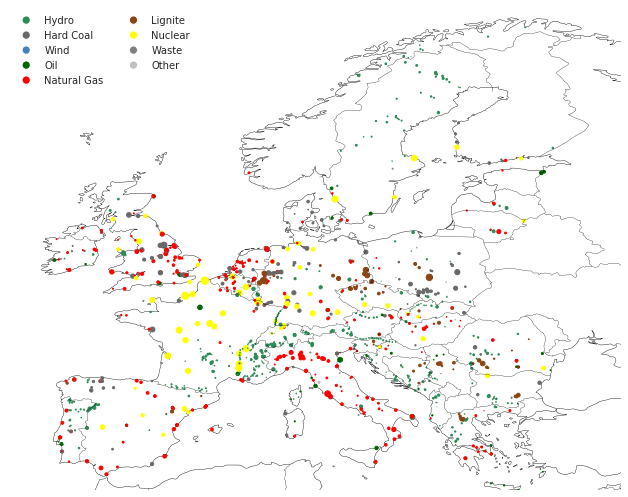

In [4]:
geo.powerplant.plot_map();

In [5]:
geo.powerplant.lookup().head(20).to_frame()

Capacity
Country                Fueltype             
Albania                Hydro        1455.726
                       Natural Gas    88.305
                       Oil           162.836
Austria                Hard Coal     989.297
                       Hydro        7256.102
                       Natural Gas  2883.085
                       Oil           481.991
                       Wind            0.000
Belgium                Hard Coal    1971.218
                       Hydro        1305.442
                       Natural Gas  4475.025
                       Nuclear      5793.162
                       Wind            0.000
Bosnia and Herzegovina Hydro        2101.863
                       Lignite      1629.448
Bulgaria               Hard Coal    1853.203
                       Hydro        2271.509
                       Lignite      2709.644
                       Nuclear      1901.892
                       Wind            0.000

In [6]:
geo.powerplant.fill_missing_commyears().head()

GEO,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,YearCommissioned,Retrofit,lat,lon,projectID
0,Aarberg,Hydro,Run-Of-River,PP,Switzerland,10.504635,NaN,NaN,NaN,NaN,1968,1968.0,47.03780,7.2720,GEO45222
1,Aberthaw,Hard Coal,Steam Turbine,PP,United Kingdom,1382.987474,NaN,NaN,NaN,NaN,2008,2008.0,51.38731,-3.4049,GEO1972
2,Ablaincourt pressoir,Wind,NaN,PP,France,NaN,NaN,NaN,NaN,NaN,1966,1966.0,49.84330,2.8017,GEO40074
3,Abono,Hard Coal,Steam Turbine,PP,Spain,849.799703,NaN,NaN,NaN,NaN,2005,2005.0,43.55280,-5.7231,GEO43673
4,Abwinden asten,Hydro,Run-Of-River,PP,Austria,113.856689,NaN,NaN,NaN,NaN,1979,1979.0,48.24798,14.4305,GEO45165


Of course the pandas function are also very convenient:

In [7]:
print('Total capacity of GEO is: \n  {} MW \n'.format(geo.Capacity.sum()));
print('The technology types are: \n {} '.format(geo.Technology.unique()))

Total capacity of GEO is: 
  604029.214937292 MW 

The technology types are: 
 ['Run-Of-River' 'Steam Turbine' nan 'CCGT' 'Reservoir' 'OCGT'
 'Pumped Storage' 'Reciprocating Engine' 'Oil Engine' 'Gas Turbine'
 'CCGT, Thermal' 'Tidal' 'Gas Engines'] 


## Incomplete data

All open databases are so far not complete and cover only an part of overall European powerplants. We perceive the capacity gaps looking at the [ENTSOE SO&AF Statistics](https://docs.entsoe.eu/dataset/scenario-outlook-adequacy-forecast-2012-2030). 

In [8]:
stats = pm.data.Capacity_stats()

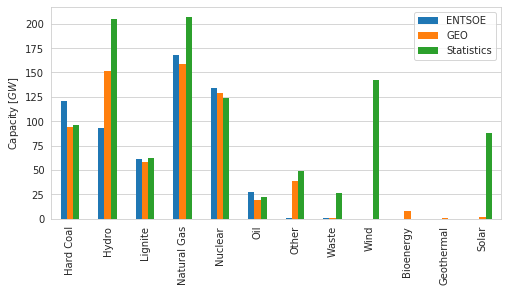

In [9]:
pm.plot.fueltype_totals_bar([geo, entsoe, stats], keys=["ENTSOE", "GEO", 'Statistics']);

The gaps for both datasets are unmistakable. Adding both datasets on top of each other would not be a solution, since the intersection of both sources are two high, and the resulting dataset would include many duplicates. A better approach is to merge the incomplete datasets together, respecting **intersections** and **differences** of each dataset. 

## Merging datasets

Before comparing two lists of power plants, we need to make sure that the data sets are on the same level of aggretation. That is, we ensure that all power plants blocks are aggregated to [powerplant stations](https://en.wikipedia.org/wiki/Power_station). 

In [10]:
dfs = [geo.powerplant.aggregate_units(), entsoe.powerplant.aggregate_units()]
intersection = pm.matching.combine_multiple_datasets(dfs)

In [11]:
intersection.head()

GEO                    Name                   Fueltype             \
                        GEO          ENTSOE        GEO     ENTSOE   
0            Abwinden asten  Abwinden asten      Hydro      Hydro   
1                     Zeran        Ec żerań  Hard Coal  Hard Coal   
2    Wybrzeze gdansk gdynia          Gdańsk  Hard Coal  Hard Coal   
3                   Wroclaw         Wrocław  Hard Coal  Hard Coal   
4                 Wloclawek       Włocławek      Hydro      Hydro   

GEO     Technology         Set         Country           ... YearCommissioned  \
               GEO ENTSOE  GEO ENTSOE      GEO   ENTSOE  ...              GEO   
0     Run-Of-River    NaN   PP     PP  Austria  Austria  ...           1979.0   
1    Steam Turbine    NaN  CHP     PP   Poland   Poland  ...              NaN   
2    Steam Turbine    NaN  CHP     PP   Poland   Poland  ...              NaN   
3    Steam Turbine    NaN  CHP     PP   Poland   Poland  ...              NaN   
4        Reservoir    NaN   PP     PP   Poland   Poland  ...           1970.0   

GEO        Retrofit              lat                 lon             \
    ENTSOE      GEO ENTSOE       GEO     ENTSOE      GEO     ENTSOE   
0      NaN   1979.0    NaN  48.24798  48.218823  14.4305  14.420281   
1      NaN      NaN    NaN  52.29500        NaN  20.9930        NaN   
2      NaN      NaN    NaN  54.37780  54.352025  18.6405  18.646638   
3      NaN      NaN    NaN  51.12360  51.107885  17.0244  17.038538   
4      NaN   1970.0    NaN  52.65640  52.648330  19.1339  19.067736   

GEO   projectID                      
            GEO              ENTSOE  
0    [GEO45165]  [14W-BAA-KW-----D]  
1    [GEO40596]  [19W000000000229Z]  
2    [GEO42488]  [19W000000000059Y]  
3    [GEO42487]  [19W000000000213D]  
4    [GEO42469]  [19W000000000004M]  

[5 rows x 30 columns]

The result of the matching process is a multiindexed dataframe. To bring the matched dataframe into a convenient format, we combine the information of the two source sources.

In [12]:
intersection = intersection.powerplant.reduce_matched_dataframe()
intersection.head()

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,YearCommissioned,Retrofit,lat,lon,projectID
0,Abwinden asten,Hydro,Run-Of-River,PP,Austria,168.0,NaN,0.0,0.0,0.0,1979.0,1979.0,48.218823,14.420281,"{'ENTSOE': ['14W-BAA-KW-----D'], 'GEO': ['GEO4..."
1,Ec żerań,Hard Coal,Steam Turbine,PP,Poland,386.0,NaN,0.0,0.0,0.0,NaN,NaN,52.295000,20.993000,"{'ENTSOE': ['19W000000000229Z'], 'GEO': ['GEO4..."
2,Gdańsk,Hard Coal,Steam Turbine,PP,Poland,217.3,NaN,0.0,0.0,0.0,NaN,NaN,54.352025,18.646638,"{'ENTSOE': ['19W000000000059Y'], 'GEO': ['GEO4..."
3,Wrocław,Hard Coal,Steam Turbine,PP,Poland,272.4,NaN,0.0,0.0,0.0,NaN,NaN,51.107885,17.038538,"{'ENTSOE': ['19W000000000213D'], 'GEO': ['GEO4..."
4,Włocławek,Hydro,Reservoir,PP,Poland,157.0,NaN,0.0,0.0,0.0,1970.0,1970.0,52.648330,19.067736,"{'ENTSOE': ['19W000000000004M'], 'GEO': ['GEO4..."


As you can see in the very last column, we can track which original data entries flew into the resulting one.

We can have a look into the Capacity statisitcs

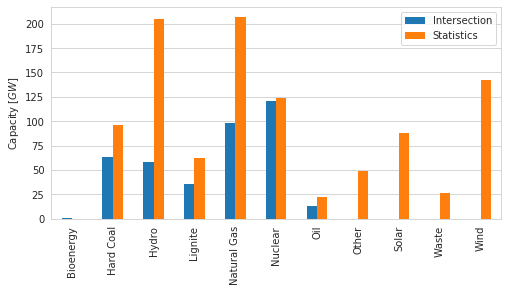

In [13]:
pm.plot.fueltype_totals_bar([intersection, stats], keys=["Intersection", 'Statistics']);

In [14]:
combined = intersection.powerplant.extend_by_non_matched(entsoe).powerplant.extend_by_non_matched(geo)

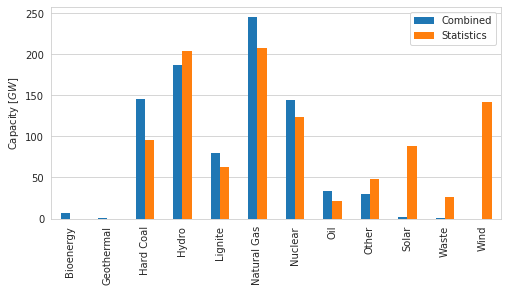

In [15]:
pm.plot.fueltype_totals_bar([combined, stats], keys=["Combined", 'Statistics']);

The aggregated capacities roughly match the SO&AF for all conventional powerplants

## Processed Data

powerplantmatching comes along with already matched data, this includes data from GEO, ENTSOE, OPSD, CARMA, GPD and ESE (ESE, only if you have followed the [instructions](https://github.com/FRESNA/powerplantmatching))

In [16]:
m = pm.collection.matched_data()

/home/fabian/vres/py/powerplantmatching/powerplantmatching/plot.py:97: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad=0.5)


(<Figure size 792x648 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f26f5f9d8d0>)

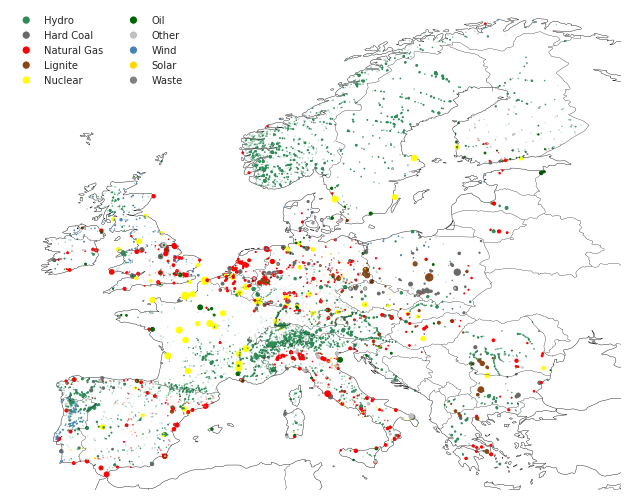

In [17]:
m.powerplant.plot_map()

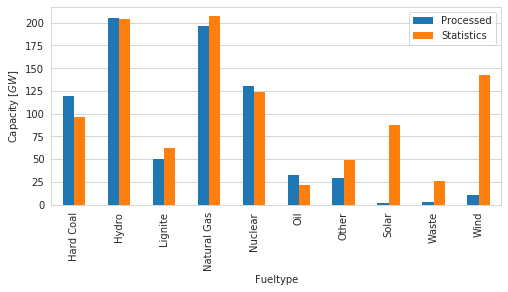

In [18]:
pm.plot.fueltype_totals_bar([m, stats], keys=["Processed", 'Statistics']);

(<Figure size 864x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f26f5fe1450>)

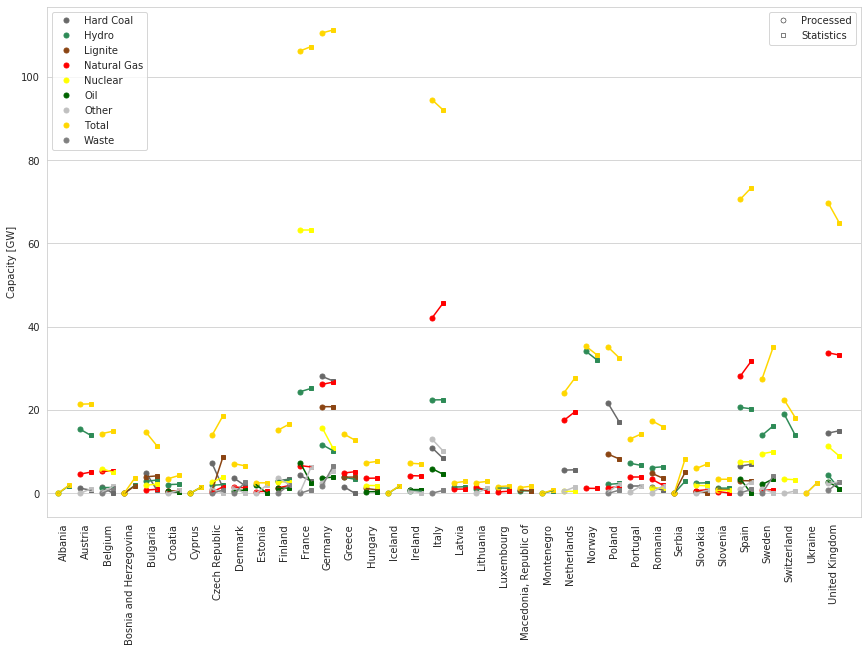

In [19]:
pm.plot.factor_comparison([m, stats], keys=['Processed', 'Statistics'])

In [20]:
m.head()

Matched Data,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,YearCommissioned,Retrofit,lat,lon,projectID
id,,,,,,,,,,,,,,,
0,Alta,Hydro,Reservoir,Store,Norway,150.00000,NaN,389.700000,135.0,185.0,1987.0,1987.0,69.718538,23.807803,"{'JRC': ['N278'], 'OPSD': ['OEU5361'], 'ENTSOE..."
1,Porabka porabka porabka,Hydro,Pumped Storage,Store,Poland,552.43949,NaN,3.620306,0.0,0.0,1953.0,1998.0,49.788898,19.206832,"{'JRC': ['H1649', 'H50'], 'OPSD': ['OEU302', '..."
2,Żydowo zydowops zydowo,Hydro,Pumped Storage,Store,Poland,157.00000,NaN,4.267516,0.0,0.0,1971.0,1971.0,54.021671,16.738544,"{'JRC': ['H315'], 'OPSD': ['OEU332', 'OEU331',..."
3,Żarnowiec zarnowiec zarnowiec,Hydro,Pumped Storage,Store,Poland,716.00000,NaN,5.027933,0.0,0.0,1983.0,2006.0,54.769766,18.046665,"{'JRC': ['H36'], 'OPSD': ['OEU327', 'OEU330', ..."
4,Svartisen,Hydro,Reservoir,Store,Norway,600.00000,NaN,8116.390000,3506.0,543.0,1993.0,2011.0,66.724624,13.941961,"{'JRC': ['N250'], 'OPSD': ['OEU5416', 'OEU5417..."


In [21]:
pd.concat([m[m.YearCommissioned.notnull()].groupby('Fueltype').YearCommissioned.count(),
          m[m.YearCommissioned.isna()].fillna(1).groupby('Fueltype').YearCommissioned.count()], 
          keys=['YearCommissioned existent', 'YearCommissioned missing'], axis=1)

,YearCommissioned existent,YearCommissioned missing
Fueltype,,
Hard Coal,143,89
Hydro,1684,3207
Lignite,51,19
Natural Gas,371,278
Nuclear,30,35
Oil,69,77
Other,140,178
Solar,5,91
Waste,75,58
